# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import the OpenWeatherMap API key
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("open_weather_api_key")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | boke
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | safford
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | veraval
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | sorong
Processing Record 21 of Set 1 | tukrah
Processing Record 22 of Set 1 | kerki
City not found. S

Processing Record 38 of Set 4 | ranong
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | mantua
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | bonavista
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | vao
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | lavrentiya
Processing Record 48 of Set 4 | sao gabriel da cachoeira
Processing Record 49 of Set 4 | abu samrah
Processing Record 0 of Set 5 | luena
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | tarazona
Processing Record 3 of Set 5 | gornyy
Processing Record 4 of Set 5 | shubarkuduk
Processing Record 5 of Set 5 | camacha
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | ust-ishim
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | denpasar
Processing Record 11 of Set 5 | poum
Proces

Processing Record 31 of Set 8 | tidore
City not found. Skipping...
Processing Record 32 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | sibolga
Processing Record 35 of Set 8 | sagua la grande
Processing Record 36 of Set 8 | noshiro
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | morehead
Processing Record 39 of Set 8 | tessalit
Processing Record 40 of Set 8 | ozgon
City not found. Skipping...
Processing Record 41 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 42 of Set 8 | bay-khaak
Processing Record 43 of Set 8 | nantucket
Processing Record 44 of Set 8 | clyde river
Processing Record 45 of Set 8 | samarai
Processing Record 46 of Set 8 | bogorodskoye
Processing Record 47 of Set 8 | victoria point
Processing Record 48 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 49 of Set 8 | ojinaga
Processing Record 0 of Set 9 | zemen
Processing Record 1 of Set 

Processing Record 15 of Set 12 | kondratovo
Processing Record 16 of Set 12 | toliary
City not found. Skipping...
Processing Record 17 of Set 12 | bandarbeyla
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | providencia
Processing Record 20 of Set 12 | nabire
Processing Record 21 of Set 12 | nelson bay
Processing Record 22 of Set 12 | naryan-mar
Processing Record 23 of Set 12 | acarau
Processing Record 24 of Set 12 | khorramshahr
Processing Record 25 of Set 12 | nova olinda do norte
Processing Record 26 of Set 12 | zharkent
Processing Record 27 of Set 12 | kipushi
Processing Record 28 of Set 12 | colares
Processing Record 29 of Set 12 | mount pleasant
Processing Record 30 of Set 12 | berlevag
Processing Record 31 of Set 12 | kimbe
Processing Record 32 of Set 12 | port-cartier
Processing Record 33 of Set 12 | taoudenni
Processing Record 34 of Set 12 | bardiyah
Processing Record 35 of Set 12 | birjand
Processing Record 36 of Set 12 | ovsyanka
Processing Record 3

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,16.81,29,40,4.12,AR,1675971645
1,pacific grove,36.6177,-121.9166,20.79,53,0,2.06,US,1675971718
2,castro,-24.7911,-50.0119,27.67,51,12,0.97,BR,1675971860
3,atuona,-9.8000,-139.0333,26.10,77,15,9.49,PF,1675971861
4,port alfred,-33.5906,26.8910,20.10,94,100,2.97,ZA,1675971862


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,16.81,29,40,4.12,AR,1675971645
1,pacific grove,36.6177,-121.9166,20.79,53,0,2.06,US,1675971718
2,castro,-24.7911,-50.0119,27.67,51,12,0.97,BR,1675971860
3,atuona,-9.8000,-139.0333,26.10,77,15,9.49,PF,1675971861
4,port alfred,-33.5906,26.8910,20.10,94,100,2.97,ZA,1675971862


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

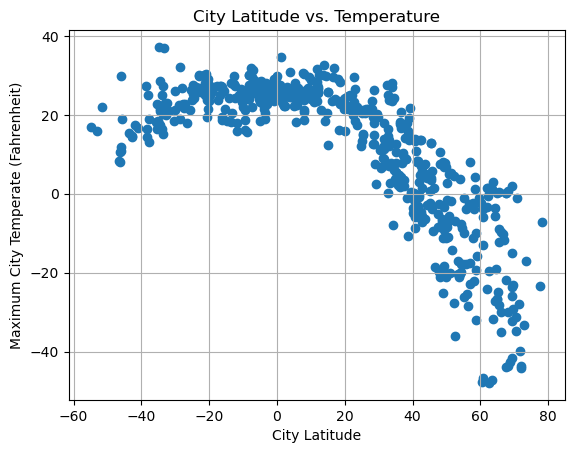

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Maximum City Temperate (Fahrenheit)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

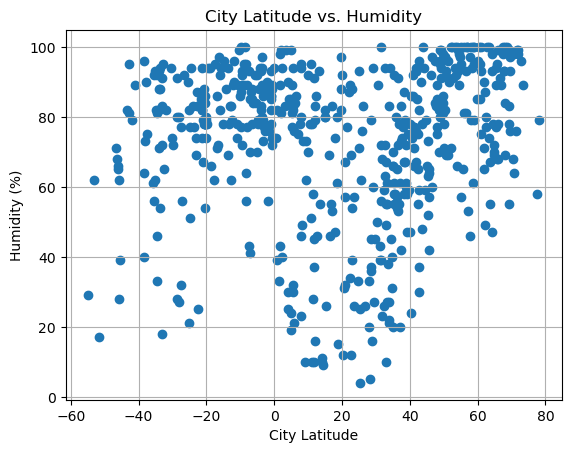

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

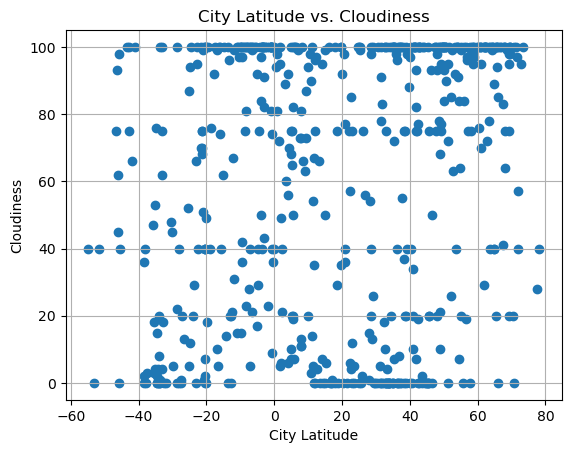

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

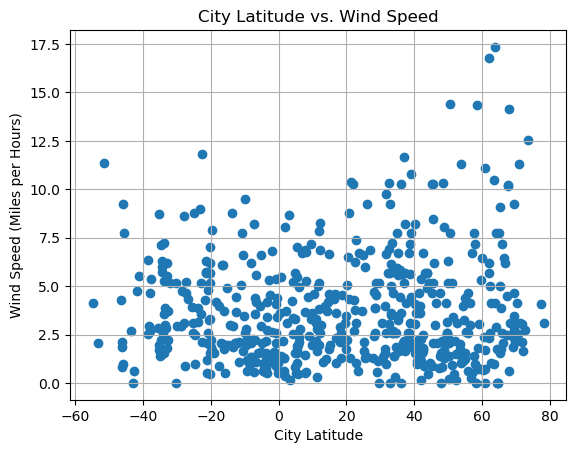

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (Miles per Hours)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def reglinefun(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(10,10),fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pacific grove,36.6177,-121.9166,20.79,53,0,2.06,US,1675971718
5,boke,10.9409,-14.2967,24.95,51,3,3.30,GN,1675971863
7,safford,32.8340,-109.7076,16.51,10,0,9.26,US,1675971866
11,georgetown,5.4112,100.3354,27.96,94,20,1.54,MY,1675971777
12,fortuna,40.5982,-124.1573,13.29,74,0,3.60,US,1675971872


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,16.81,29,40,4.12,AR,1675971645
2,castro,-24.7911,-50.0119,27.67,51,12,0.97,BR,1675971860
3,atuona,-9.8000,-139.0333,26.10,77,15,9.49,PF,1675971861
4,port alfred,-33.5906,26.8910,20.10,94,100,2.97,ZA,1675971862
6,esperance,-33.8667,121.9000,16.37,82,8,3.55,AU,1675971865


###  Temperature vs. Latitude Linear Regression Plot

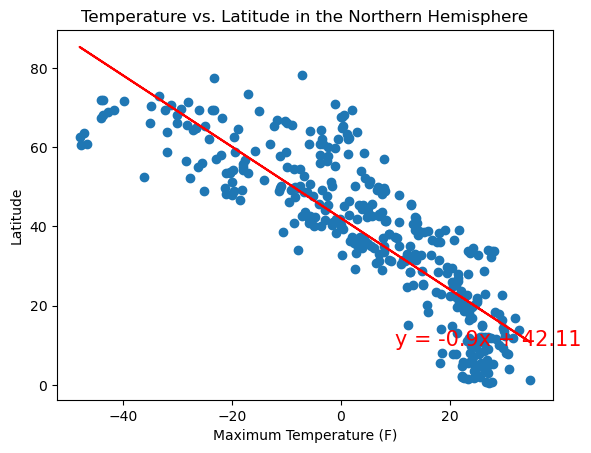

In [15]:
# Linear regression on Northern Hemisphere
reglinefun(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"], 
                        "Maximum Temperature (F)", "Latitude", 
                        "Temperature vs. Latitude in the Northern Hemisphere")

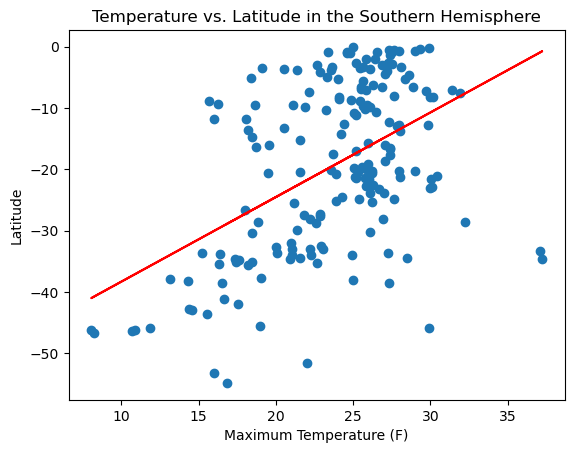

In [16]:
# Linear regression on Southern Hemisphere
reglinefun(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"], 
                        "Maximum Temperature (F)", "Latitude", 
                        "Temperature vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is strong negative correlation between latitude and temperature, meaning that as the latitude increases, the maximum temperature decreases. In the Southern Hemisphere, there is a weaker positive correlation between latitude and temperature, meaning that as the latitude decreases, the maximum temperature decreases at a much weaker correlation than the one shown in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

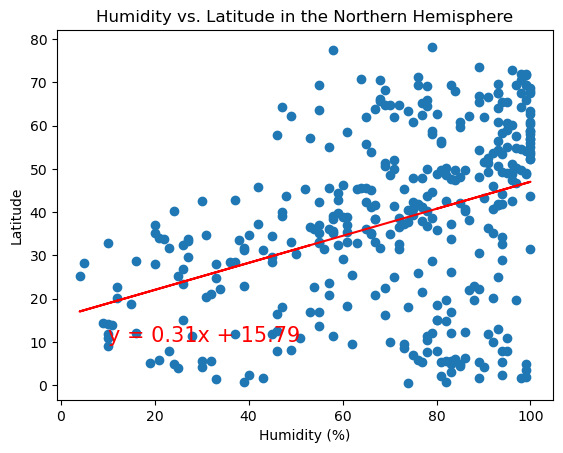

In [17]:
# Northern Hemisphere
reglinefun(northern_hemi_df["Humidity"],northern_hemi_df["Lat"], 
                        "Humidity (%)", "Latitude", 
                        "Humidity vs. Latitude in the Northern Hemisphere")

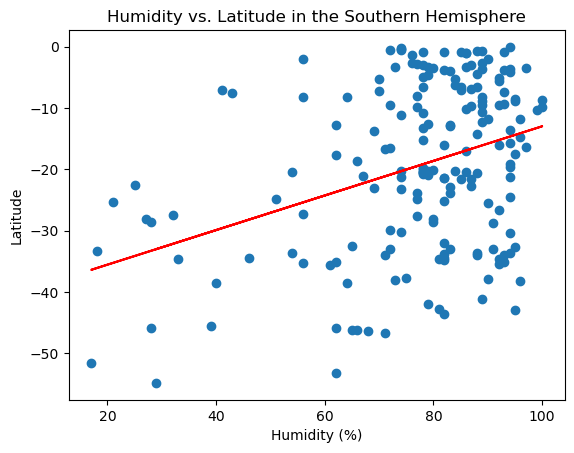

In [18]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Humidity"],southern_hemi_df["Lat"], 
                        "Humidity (%)", "Latitude", 
                        "Humidity vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is moderate positive correlation between humidity and temperature, meaning that as the latitude increases, the humidity increases. In the Southern Hemisphere, there is also a positive correlation between humidity and temperature. It is important to note that most of the data is skewed in the direction of higher humidity, meaning that the Southern Hempishere is generally more humid.

### Cloudiness vs. Latitude Linear Regression Plot

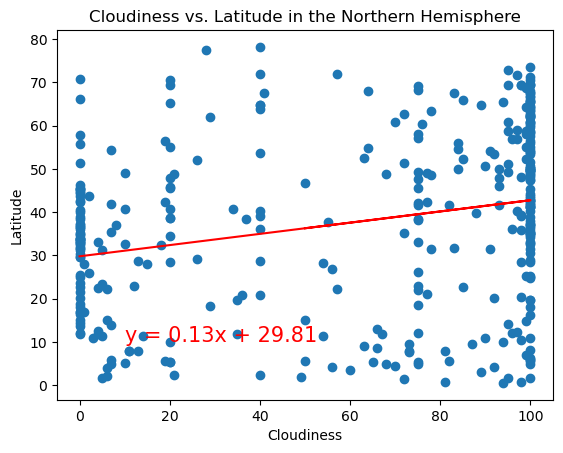

In [19]:
reglinefun(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"], 
                        "Cloudiness", "Latitude", 
                        "Cloudiness vs. Latitude in the Northern Hemisphere")

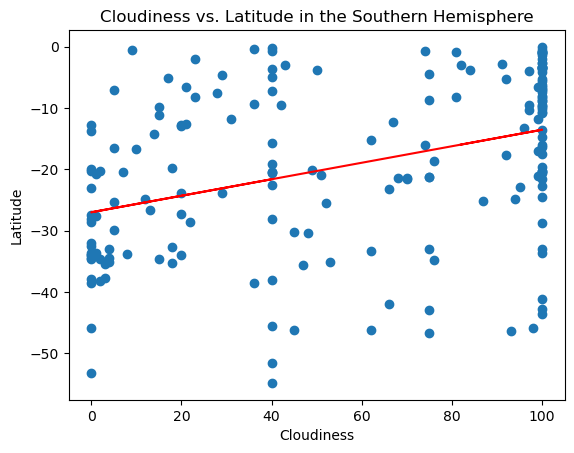

In [20]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"], 
                        "Cloudiness", "Latitude", 
                        "Cloudiness vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere there is a very weak positive correlation between increase in latitude and cloudiness. However, it is so minor it may not be significant (cannot tell without a Pearson correlation coefficient). It is important to note that cloudiness is mostly a binary factor (especially in the Northern Hemisphere), with the heaviest concentration of records being on the high and low end of cloudiness with little in the middle.

### Wind Speed vs. Latitude Linear Regression Plot

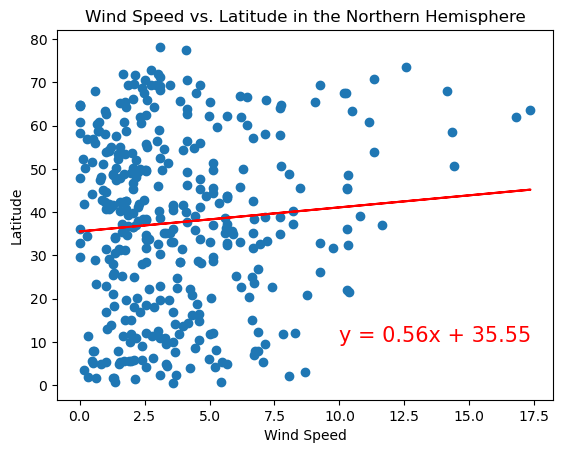

In [21]:
# Northern Hemisphere
reglinefun(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"], 
                        "Wind Speed", "Latitude", 
                        "Wind Speed vs. Latitude in the Northern Hemisphere")

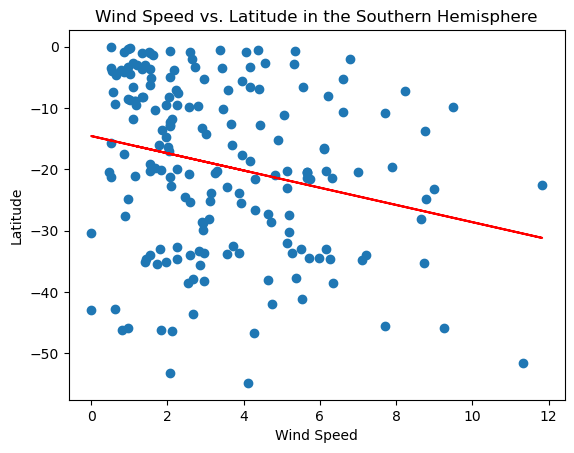

In [22]:
# Southern Hemisphere
reglinefun(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"], 
                        "Wind Speed", "Latitude", 
                        "Wind Speed vs. Latitude in the Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a slight positive correlation between increased latitude and increased wind speed, with the majority of wind speeds skewing lower. In the Southern Hemisphere, there is a slight negative correlation decreased latitude and increased wind speed, meaining the further from the equator, the lower the winds. 